### Import Libraries

In [4]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### Read in the dataset

In [5]:
movies_data = pd.read_csv('/Users/sba/Downloads/movies_data.csv')
movies_data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### Finding Null Values and Drop them

In [6]:
movies_data_without_nulls = movies_data.dropna()
movies_data_without_nulls.to_csv('updated_movies_data', index=False)

updated_data = pd.read_csv('updated_movies_data')
updated_data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### Check datatypes

In [8]:
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5421 entries, 0 to 5420
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 635.4+ KB


### Changing datatypes

In [7]:


updated_data['budget'] = updated_data['budget'].astype('int64')

updated_data['gross'] = updated_data['gross'].astype('int64')

updated_data['runtime'] = updated_data['runtime'].astype('int64')

updated_data['votes'] = updated_data['votes'].astype('int64')

updated_data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


### Taking out the country component in the released column

In [16]:
updated_data['Country'] = updated_data['released'].str.extract(r'\((.*?)\)')

updated_data['Country'] = updated_data['Country'].str.strip('()')

updated_data = updated_data.drop('Country', axis=1)

updated_data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3731,Avatar,PG-13,Action,2009,"December 18, 2009",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
5302,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
1795,Titanic,PG-13,Drama,1997,"December 19, 1997",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
4730,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
5158,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,Tanner Hall,R,Drama,2009,"January 15, 2015",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96
1378,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97
2286,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108
154,Parasite,R,Horror,1982,"March 12, 1982",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85


### Changing the released column datatype and extracting the year in the released column to a new column "year of release"

In [21]:
updated_data['released'] = pd.to_datetime(updated_data['released'], errors='coerce')
updated_data['year of release'] = updated_data['released'].dt.year

updated_data.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year of release
3731,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
5302,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
1795,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
4730,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
5158,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


### Drop duplicate Values in the dataset

In [22]:
updated_data = updated_data.drop_duplicates().sort_values('gross', ascending=False)

updated_data.to_csv('updated_movie_data', index=False)

updated_data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year of release
3731,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
5302,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
1795,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
4730,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
5158,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


### Scatter plot representing the relationship between the 'budget' and 'gross' variables, along with a regression line that indicates the trend between the two variables.

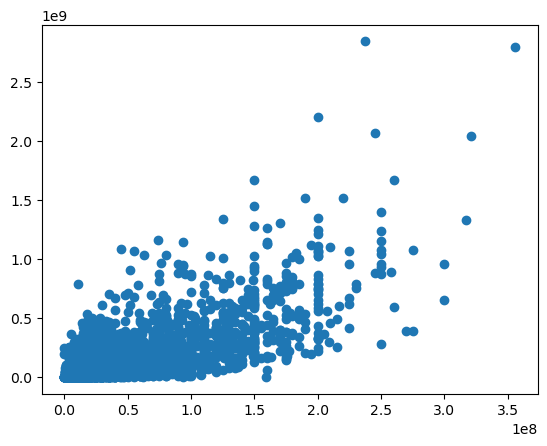

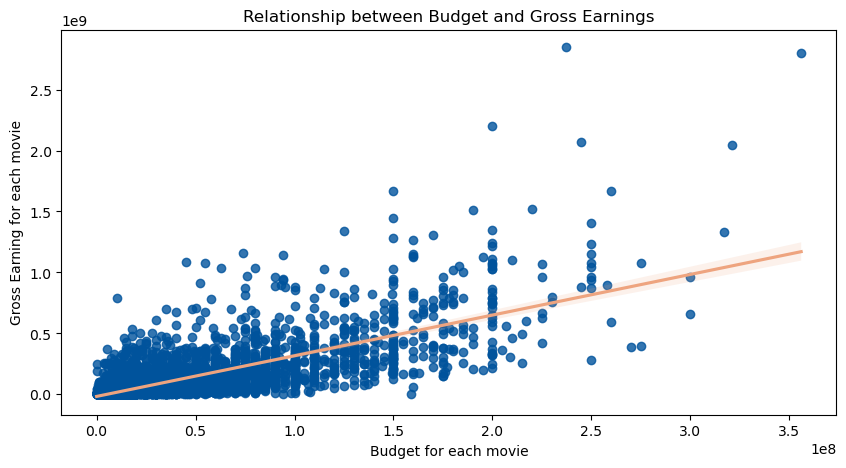

In [21]:
plt.scatter(x=updated_data['budget'], y=updated_data['gross'])
fig = plt.figure(figsize=(10, 5))
sns.regplot(x='budget', y='gross', data=updated_data, scatter_kws={'color': '#00539C'}, line_kws={'color': '#EEA47F'})
plt.xlabel('Budget for each movie')
plt.ylabel('Gross Earning for each movie')
plt.title('Relationship between Budget and Gross Earnings')
plt.show()

### shows the correlation coefficients between all pairs of numeric columns in the updated_data DataFrame.

In [34]:
updated_data.corr()

,score,votes,budget,gross,runtime,year of release
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
year of release,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


### The plot will show a heatmap with the correlation coefficients between variables in the updated_data DataFrame.

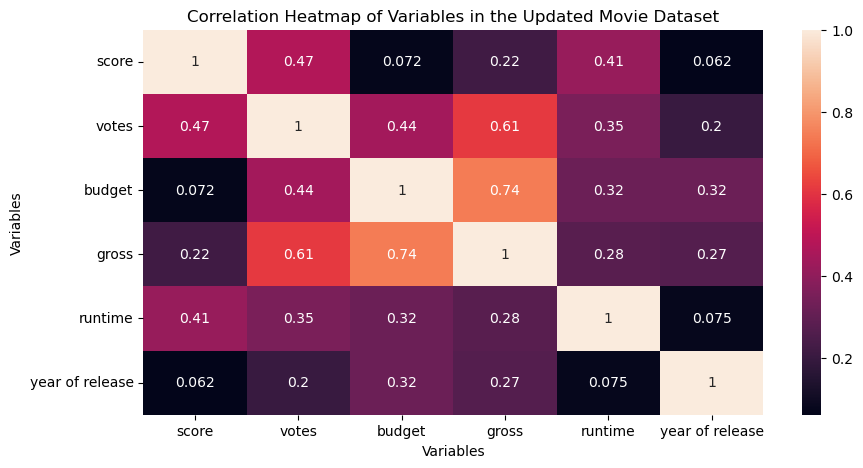

In [35]:
corr_matrix = updated_data.corr(method='pearson')
fig = plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap of Variables in the Updated Movie Dataset')
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

###  converting categorical columns to numerical codes

In [24]:
updated_data_numeric = updated_data.copy()

for col in updated_data_numeric.columns:
    if updated_data_numeric[col].dtype == 'object':
        updated_data_numeric[col] = updated_data_numeric[col].astype('category')
        updated_data_numeric[col] = updated_data_numeric[col].cat.codes
        
updated_data_numeric.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year of release
3731,386,5,0,2009-12-18,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,2009
5302,388,5,0,2019-04-26,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,2019
1795,4909,5,6,1997-12-19,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,1997
4730,3643,5,0,2015-12-18,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,2015
5158,389,5,0,2018-04-27,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,2018


### Generates a correlation heatmap to visualize the correlation matrix of numeric variables in the updated_data_numeric DataFrame.

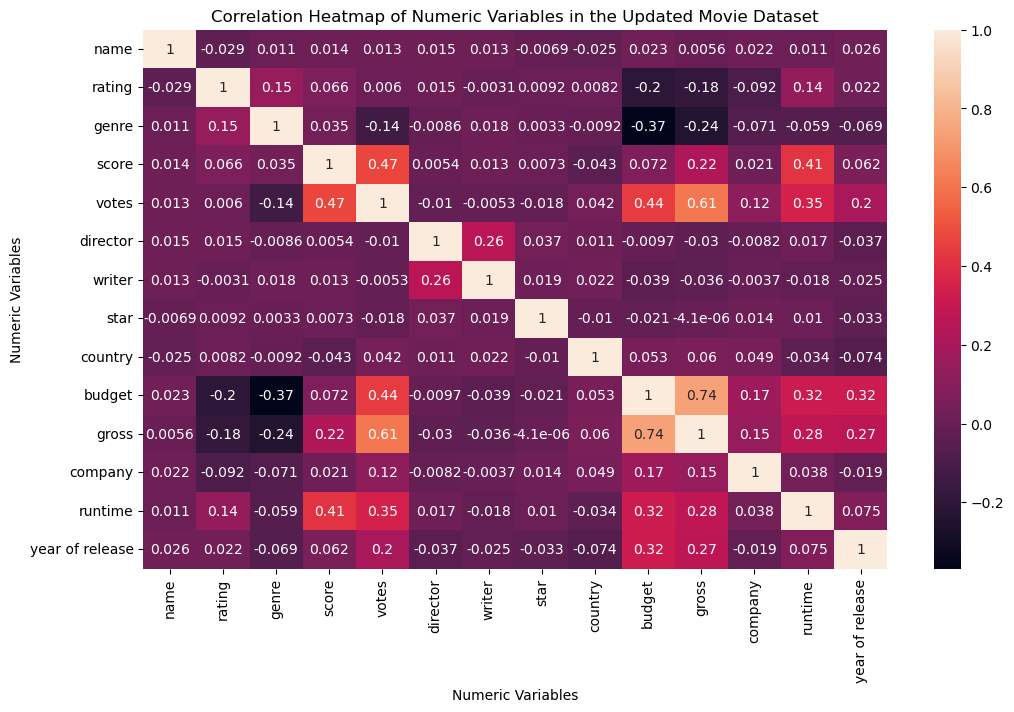

In [36]:
corr_matrix = updated_data_numeric.corr(method='pearson')
fig = plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True)
plt.xlabel("Numeric Variables")
plt.ylabel("Numeric Variables")
plt.title('Correlation Heatmap of Numeric Variables in the Updated Movie Dataset')
plt.show()

### Calculates the correlation between all pairs of variables in the updated_data_numeric DataFrame and store the results in the corr_pairs variable.

In [37]:
corr_mat = updated_data_numeric.corr()

corr_pairs = corr_mat.unstack()

corr_pairs

name             name               1.000000
                 rating            -0.029234
                 genre              0.010996
                 score              0.014450
                 votes              0.012615
                                      ...   
year of release  budget             0.320312
                 gross              0.268721
                 company           -0.018806
                 runtime            0.075294
                 year of release    1.000000
Length: 196, dtype: float64

### Sort the correlation pairs in ascending order based on the correlation value

In [29]:
sort_pairs = corr_pairs.sort_values()

sort_pairs

genre            budget            -0.368523
budget           genre             -0.368523
genre            gross             -0.244101
gross            genre             -0.244101
rating           budget            -0.203946
                                      ...   
score            score              1.000000
genre            genre              1.000000
rating           rating             1.000000
runtime          runtime            1.000000
year of release  year of release    1.000000
Length: 196, dtype: float64

### pairs that have a high correlation

In [30]:
high_correlation = sort_pairs[(sort_pairs) > 0.5]

high_correlation 

gross            votes              0.614751
votes            gross              0.614751
budget           gross              0.740247
gross            budget             0.740247
name             name               1.000000
company          company            1.000000
gross            gross              1.000000
budget           budget             1.000000
country          country            1.000000
star             star               1.000000
writer           writer             1.000000
director         director           1.000000
votes            votes              1.000000
score            score              1.000000
genre            genre              1.000000
rating           rating             1.000000
runtime          runtime            1.000000
year of release  year of release    1.000000
dtype: float64

In [15]:
pd.read_csv('updated_data')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
1,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
2,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
3,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
4,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96
5417,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97
5418,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108
5419,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85
